# Q7

Write down the formula for μu in terms of Iu and ruk:
μu = sum(Iuk*ruk)/len(Iu)

# Q8

Iu&&Iv means the common movies rated by both user u and user v.
Iu&&Iv can be zero. Because the rating matrix R is sparse. So the situation both u and v have not seen common movies could happen.

# Q9

Because mean-centering the raw rating could prevent some bad situation such like some users rate all item too high or too low. Without mean-centering, the accuracy for prediction will be poor.

# Q10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
import os
from surprise.prediction_algorithms.knns import KNNWithMeans
# path to dataset file
file_path = os.path.expanduser('~/Desktop/UCLA/2018winter-EE219 Large Scale Data Mining/project/project3/ml-latest-small/ratings.csv')

# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file(file_path, reader=reader)
print(data)

In [3]:
rmse=[]
mae =[]

for k in range(2,101):    
    # We can now use this dataset as we please, e.g. calling cross_validate
    sim_options = {'name': 'pearson'}
    algo = KNNWithMeans(k = k, sim_options = sim_options)
    ret = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse.append(np.mean(ret['test_rmse']))
    mae.append(np.mean(ret['test_mae']))


Text(0,0.5,'mae')

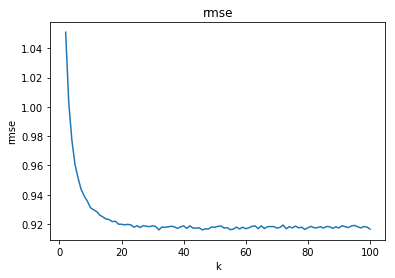

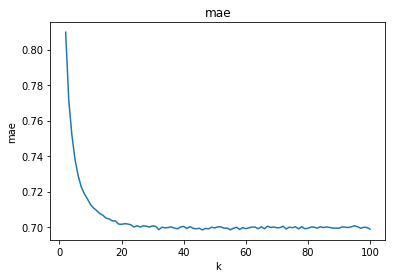

In [4]:
x = range(2,101)

plt.figure(1)
plt.plot(x,rmse)
plt.title('rmse')
plt.xlabel('k')
plt.ylabel('rmse')
plt.figure(2)
plt.plot(x,mae)
plt.title('mae')
plt.xlabel('k')
plt.ylabel('mae')

# Q11

According to the plot above, the steady state of values of RMSE and MAE is 35.

# Q12 -- Q14

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data_pd = pd.read_csv('ml-latest-small/ratings.csv', sep=',')

print(len(data_pd))
data_pd.head()

100004


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
data_popular = data_pd.groupby('movieId').filter(lambda x: len(x) > 2)
data_unpopular = data_pd.groupby('movieId').filter(lambda x: len(x) <= 2)
data1 =data_pd.groupby('movieId').filter(lambda x: len(x) >= 5)
data_highvar=data1.groupby('movieId').filter(lambda x: np.var(x['rating']) >= 2 )

In [5]:
reader = Reader()
dataset_popular = Dataset.load_from_df(data_popular[['userId', 'movieId', 'rating']], reader)
dataset_unpopular = Dataset.load_from_df(data_unpopular[['userId', 'movieId', 'rating']], reader)
dataset_highvar = Dataset.load_from_df(data_highvar[['userId', 'movieId', 'rating']], reader)

In [6]:
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
import os
from surprise.prediction_algorithms.knns import KNNWithMeans

popular_rmse=[]
unpopular_rmse=[]
highvar_rmse = []

for k in range(2,101):
    sim_options = {'name': 'pearson'}
    algo = KNNWithMeans(k = k, sim_options = sim_options)
    
    ret_pop = cross_validate(algo, dataset_popular, measures=['RMSE'], cv=10, verbose=False)
    ret_unpop = cross_validate(algo, dataset_unpopular, measures=['RMSE'], cv=10, verbose=False)
    ret_highvar = cross_validate(algo, dataset_highvar, measures=['RMSE'], cv=10, verbose=False)
    
    popular_rmse.append(np.mean(ret_pop['test_rmse']))
    unpopular_rmse.append(np.mean(ret_unpop['test_rmse']))
    highvar_rmse.append(np.mean(ret_highvar['test_rmse']))

print(len(popular_rmse))
print(len(unpopular_rmse))
print(len(highvar_rmse))

99
99
99


The minimum average rmse of popular data is: 0.896537 with k = 61
The minimum average rmse of unpopular data is: 1.107771 with k = 28
The minimum average rmse of high variance data is: 1.564669 with k = 79


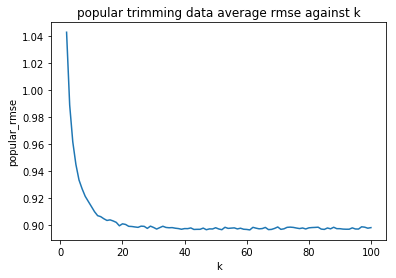

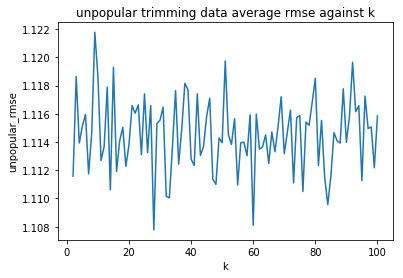

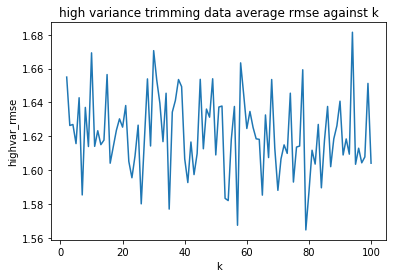

In [20]:
k_group=range(2,101)

plt.figure()
plt.plot(k_group,popular_rmse)
plt.xlabel("k")
plt.ylabel("popular_rmse")
plt.title("popular trimming data average rmse against k")

k_value=k_group[np.argmin(popular_rmse)]
print("The minimum average rmse of popular data is: %6f"%min(popular_rmse)+" with k = %d"%k_value)

plt.figure()
plt.plot(k_group,unpopular_rmse)
plt.xlabel("k")
plt.ylabel("unpopular_rmse")
plt.title("unpopular trimming data average rmse against k")

k_value=k_group[np.argmin(unpopular_rmse)]
print("The minimum average rmse of unpopular data is: %6f"%min(unpopular_rmse)+" with k = %d"%k_value)

plt.figure()
plt.plot(k_group,highvar_rmse)
plt.xlabel("k")
plt.ylabel("highvar_rmse")
plt.title("high variance trimming data average rmse against k")

k_value=k_group[np.argmin(highvar_rmse)]
print("The minimum average rmse of high variance data is: %6f"%min(highvar_rmse)+" with k = %d"%k_value)

# Q15

In [11]:
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
import os
from surprise.prediction_algorithms.knns import KNNWithMeans
# path to dataset file
file_path = os.path.expanduser('~/Desktop/UCLA/2018winter-EE219 Large Scale Data Mining/project/project3/ml-latest-small/ratings.csv')


# 'user item rating timestamp', separated by ',' characters. skip the first line with header
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

#split the dataset into 90% for training and 10% for testing
data = Dataset.load_from_file(file_path, reader=reader)
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.10)

# We'll use the KNNWithMeans algorithm.
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(k = 35, sim_options = sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [12]:
print(trainset.ir)

defaultdict(<class 'list'>, {0: [(0, 0.5), (96, 1.0)], 1: [(1, 2.0), (131, 4.0), (505, 5.0), (32, 3.0), (340, 2.0), (145, 4.0), (40, 4.0), (375, 3.0), (363, 3.0), (525, 5.0), (23, 4.0), (140, 5.0), (117, 2.5), (22, 3.0), (106, 4.0), (262, 3.0), (339, 5.0), (535, 5.0), (0, 4.5), (206, 5.0), (78, 4.0), (584, 4.0), (21, 1.0), (56, 4.0), (232, 5.0), (620, 2.0), (235, 3.0), (126, 2.5), (25, 2.5), (171, 5.0), (73, 3.5), (103, 4.0), (312, 5.0), (142, 3.0), (182, 4.5), (170, 2.5), (281, 3.0), (31, 4.0), (433, 2.0), (293, 2.0), (110, 3.0), (41, 3.0), (379, 4.0), (77, 4.5), (265, 4.0), (113, 4.0), (326, 2.0), (330, 4.5), (54, 2.0), (386, 5.0), (342, 4.0), (93, 4.0), (96, 5.0), (174, 4.0), (24, 3.0), (161, 5.0), (135, 1.0), (112, 4.5), (234, 5.0), (156, 2.0)], 2: [(2, 4.0), (244, 3.5), (313, 5.0), (87, 4.0), (86, 4.0), (126, 3.5), (5, 3.0), (407, 4.5), (205, 4.5), (72, 4.0), (186, 2.5), (10, 3.5), (223, 4.5), (391, 3.0), (75, 3.0), (552, 4.0), (108, 4.0), (505, 3.0), (23, 4.0), (382, 4.5), (418, 

In [13]:
test_target_group = []
score_test = []
for (_, _, true_r, est, _) in predictions:
    test_target_group.append(true_r)
    score_test.append(est)
print(test_target_group[0:10])
def threshold_target(threshold,test_target_group):
    aft_test = []
    for i in test_target_group:
        if i>= threshold: k = 1
        else: k=0
        aft_test.append(k)
    return aft_test

[0.5, 4.0, 5.0, 3.0, 3.0, 3.0, 3.5, 2.0, 4.0, 3.0]


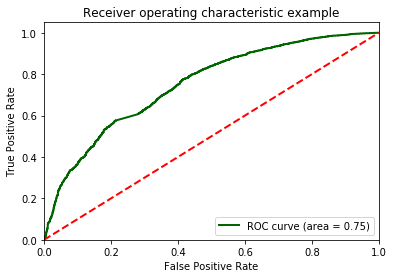

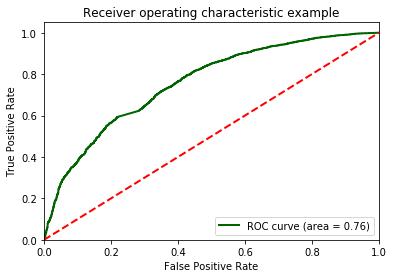

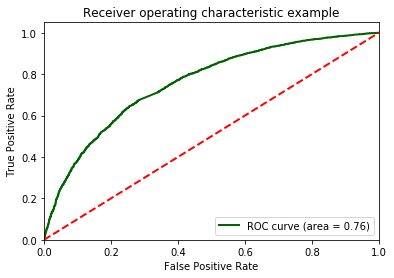

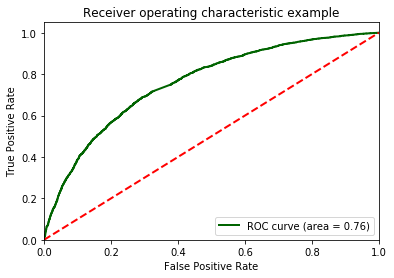

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# calculate ROC curve and ROC area for each class


def plot_roc(fpr, tpr):   
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkgreen',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

for threshold in [2.5,3,3.5,4]:
    aft_test = threshold_target(threshold,test_target_group)
    fpr = dict()
    tpr = dict()
    fpr, tpr, thresholds = roc_curve(aft_test, score_test)
    plot_roc(fpr, tpr)

# Problem 8 --Ranking

In [60]:
A = defaultdict(list)
A[0].append((1,3.2,4))
A[0].append((2,3.1, 4))
A[0].append((3,3, 4))
A[1].append((1,3.3, 4))
A[1].append((4,3.4, 4))
A[2].append((3,1,4 ))

print(A)


    
for uid, user_ratings in list(A.items()):
    user_ratings.sort(key=lambda x: x[0], reverse=True)
    #print(user_ratings)
    print(A[uid])
    print(A[uid][0])
    #rel = sum((user_ratings[1] >= 3) for (_, user_ratings[1]) in user_ratings)
    #if rel==0:
        #del user_est_true[uid]

    
print(A)

defaultdict(<class 'list'>, {0: [(1, 3.2, 4), (2, 3.1, 4), (3, 3, 4)], 1: [(1, 3.3, 4), (4, 3.4, 4)], 2: [(3, 1, 4)]})
[(3, 3, 4), (2, 3.1, 4), (1, 3.2, 4)]
(3, 3, 4)
[(4, 3.4, 4), (1, 3.3, 4)]
(4, 3.4, 4)
[(3, 1, 4)]
(3, 1, 4)
defaultdict(<class 'list'>, {0: [(3, 3, 4), (2, 3.1, 4), (1, 3.2, 4)], 1: [(4, 3.4, 4), (1, 3.3, 4)], 2: [(3, 1, 4)]})


In [67]:
from collections import defaultdict

from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k, threshold=3):
    '''Return precision and recall at k metrics for each user.'''
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    for uid, user_ratings in list(user_est_true.items()):
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        if n_rel==0:
            del user_est_true[uid]
    
    for uid, user_ratings in list(user_est_true.items()):
        if len(user_est_true[uid])<k:
            del user_est_true[uid] 
    
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)   
        # Number of relevant items : G
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k]) 
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1 
    return precisions, recalls

file_path = os.path.expanduser('~/Desktop/UCLA/2018winter-EE219 Large Scale Data Mining/project/project3/ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

#data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=10)
algo = KNNWithMeans(k = 35, sim_options = sim_options)


In [68]:
def GetMean_prec_rec(k):
    prec=[]
    rec=[]
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3)
        # Precision and recall can then be averaged over all users
        prec.append(sum(prec for prec in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    prec_mean = np.mean(prec)
    rec_mean = np.mean(rec)
    return prec_mean,rec_mean

prec = []
rec = []
for k in range(1,26):
    prec_mean,rec_mean = GetMean_prec_rec(k)
    prec.append(prec_mean)
    rec.append(rec_mean)
print(prec)
print(rec)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

In [69]:
print(len(prec))

25


Text(0.5,1,'average precision against average recall')

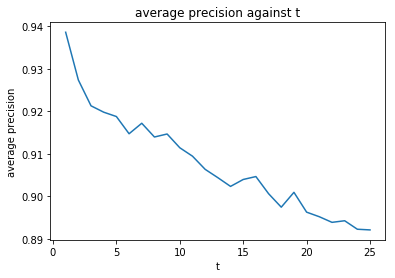

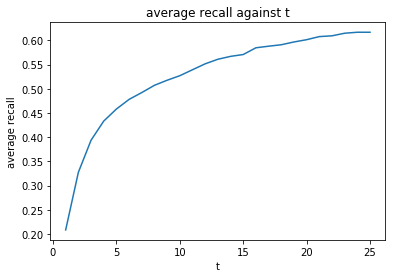

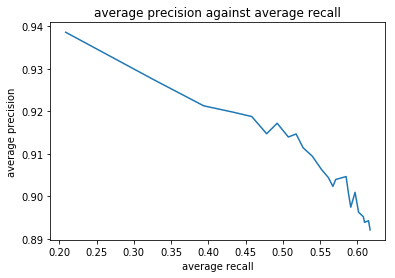

In [71]:
k = range(1,26)

plt.figure()
plt.plot(k,prec)
plt.xlabel("t")
plt.ylabel("average precision")
plt.title("average precision against t")

plt.figure()
plt.plot(k,rec)
plt.xlabel("t")
plt.ylabel("average recall")
plt.title("average recall against t")

plt.figure()
plt.plot(rec, prec)
plt.xlabel("average recall")
plt.ylabel("average precision")
plt.title("average precision against average recall")